## Homework 3

## <em>Intro to Statistics - Part 2</em>
<br>
This notebook is arranged in cells. Texts are usually written in the markdown cells, and here you can use html tags (make it bold, italic, colored, etc). You can double click on this cell to see the formatting.<br>
<br>
The ellipsis (...) are provided where you are expected to write your solution but feel free to change the template (not over much) in case this style is not to your taste. <br>
<br>
<em>Hit "Shift-Enter" on a code cell to evaluate it.  Double click a Markdown cell to edit. </em><br>

***
### Link Okpy

In [ ]:
from client.api.notebook import Notebook
ok = Notebook('hw3.ok')
_ = ok.auth(inline = True)

### Imports

In [1]:
import numpy as np
from scipy.integrate import quad
#For plotting
import matplotlib.pyplot as plt
%matplotlib inline

***

#### Problem 1 - Fitting Gaussian Contours to a 2D Data

Gaussian distribution function plays a central role in statistics and is the most ubiquitous distribution in physics. It often provides a good approximation to the true probability density function (pdf) even in cases where its application is not strictly correct. <br><br>
In this problem, suppose that you have measured 1000 pairs of values $(x_1, y_1), ... , (x_{1000}, y_{1000})$ of two variables $x, y$. You saved these measurements to a .dat file ("Problem1_data.dat"). Plot their 1-dimensional pdf's and determine how well Gaussian pdf can approximate them. Compute the mean, variance, median, mode, 68% and 95% confidence intervals, and correlation coefficient.

<span style="color:blue"><i> 1. Plot 1-dimensional pdf for $x$. </i></span> <br>

In [137]:
# Load a given 2D data
data = np.loadtxt("Problem1_data.dat")
x = data[:,0]
y = data[:,1]

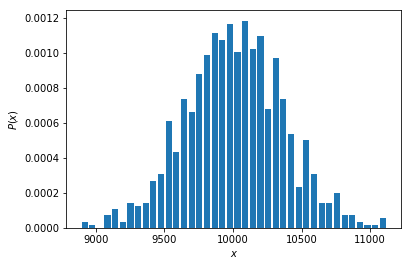

In [12]:
# Plot a normalized histogram (Hint - https://matplotlib.org/devdocs/api/_as_gen/matplotlib.pyplot.hist.html)

# Having 25 elements per each bin
N = len(x); n = int(N/25)
# Make plot
plt.hist(x, bins = n, histtype = 'bar', normed = True, rwidth = 0.8)
plt.xlabel('$x$')
plt.ylabel('$P(x)$')
plt.show()

<span style="color:blue"> <i> 2. Calculate mean, variance, and median of $x$. First, do it "by hand" without using any in-built functions. Then, check your answers using in-built functions from numpy. </i></span>

In [34]:
# Calculating "by hand"
mean_x = sum(x)/len(x)
variance_x = sum((x-mean_x)**2)/len(x)

x_sorted = sorted(x)
if len(x)%2 == 0:
    median_x = (x_sorted[int( (len(x)/2)-1 )] + x_sorted[int( (len(x)/2) )])/2.
else:
    median_x =  x_sorted[int( np.floor(len(x)/2) )]

print("For x, mean = ", mean_x, ", variance = ", variance_x, ", and median = ", median_x)

# Using in-built functions from numpy
mean_x = np.mean(x)
variance_x = np.var(x)
median_x = np.median(x)

print("For x, mean = ", mean_x, ", variance = ", variance_x, ", and median = ", median_x)

For x, mean =  10011.5939237 , variance =  125445.68122 , and median =  10011.8167321
For x, mean =  10011.5939237 , variance =  125445.68122 , and median =  10011.8167321


<span style="color:blue"> <i> 3. Smoothly interpolate the discrete probability density from Part 1. Then, find the mode and symmetric 68%, 95% confidence intervals. (Suggestion - https://docs.scipy.org/doc/scipy/reference/generated/scipy.interpolate.UnivariateSpline.html)</i></span><br><br>
(Hint - For 68% confidence interval, find the range where 68% of the given sample occurs. We assume that such interval is symmetrically placed around the mean. <br>
In other words, find $a$ such taht
$$ 0.68 = \int_{\mu-a}^{\mu+a} P(x) $$
where $P(x)$ is $x$'s pdf, and $\mu$ is the mean.<br>
One way to find $a$ is to define a cumulative distribution function (cdf) $G(x)$ and find $a$ such that $G(\mu+a)-G(\mu-a) = .68$.)

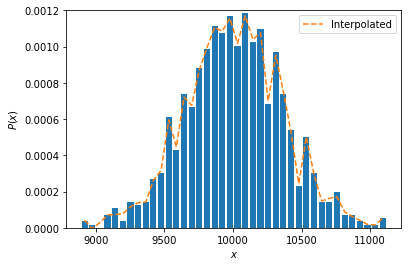

In [89]:
from scipy.interpolate import UnivariateSpline

p, xvar = np.histogram(x, bins = n, normed = True)
# Find x values at the center of each bin (call it xvar)
xvar = xvar[:-1] + (xvar[1] - xvar[0])/2

# Find the interpolated function f
f = UnivariateSpline(xvar, p, s=n)
# Change the amount of smoothing
f.set_smoothing_factor(1.e-8)

# Plot both histogram and interpolated function
plt.hist(x, bins = n, histtype = 'bar', normed = True, rwidth = 0.8)
plt.plot(xvar, f(xvar), '--', label = "Interpolated")
plt.ylim(0, 0.0012)
plt.legend()
plt.xlabel('$x$')
plt.ylabel('$P(x)$')
plt.show()

For x, mode =  10089.1802887


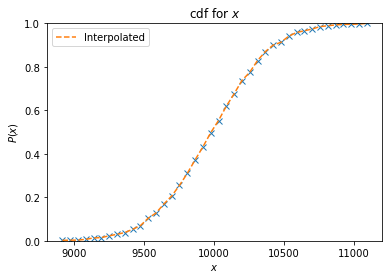

For x, 68% confidence interval is 10011.5939237 ± 346.391089604 and 95% interval is 10011.5939237 ± 713.501891623


In [122]:
# Find the mode
mode_x = xvar[np.argmax(f(xvar))]

print("For x, mode = ", mode_x)

# Find 68% and 95% confidence intervals

# Define the cdf
p, xvar = np.histogram(x, bins = n, normed = True)
delta_xvar = (xvar[1] - xvar[0])
cdf = p*delta_xvar
for i in range(len(cdf))[1:]:
    cdf[i] = cdf[i-1] + cdf[i]
xvar = xvar[:-1] + (xvar[1] - xvar[0])/2

# Interpolation
cdf_interpolated = UnivariateSpline(xvar, cdf, s=n)
cdf_interpolated.set_smoothing_factor(0)

# Plot the cdf (Optional)
plt.plot(xvar, cdf, 'x')
plt.plot(xvar, cdf_interpolated(xvar), '--', label = "Interpolated")
plt.ylim(0, 1)
plt.xlabel('$x$')
plt.ylabel('$P(x)$')
plt.title('cdf for $x$')
plt.legend()
plt.show()

# Write a function which computes the confidence interval
def findinterval(f, percentage):    
    delta_x = np.sqrt(variance_x)/2000
    testx = np.append( np.arange(mean_x-3*np.sqrt(variance_x), mean_x, delta_x), np.arange(mean_x, mean_x+3*np.sqrt(variance_x), delta_x) )

    ind = int(len(testx)/2)

    for i in range(int(len(testx)/2)):
        if cdf_interpolated(testx[ind+i])-cdf_interpolated(testx[ind-i]) > percentage:
            val = testx[ind+i] - testx[ind]
            break
    return val

print("For x, 68% confidence interval is", mean_x, "±", findinterval(cdf_interpolated, .68), 
      "and 95% interval is", mean_x, "±", findinterval(cdf_interpolated, .95))

Assuming that the distribution is Gaussian, 68% and 95% confidence interval corresponds to $\mu \pm 1\sigma$ and $\mu \pm 2\sigma$.  </i></span>

In [85]:
print("Assuming Gaussian distribution, 68% confidence interval is", mean_x, "±", np.sqrt(variance_x), 
     ", and 95% interval is", mean_x, "±", 2*np.sqrt(variance_x))

Assuming Gaussian distribution, 68% confidence interval is 10011.5939237 ± 354.183118204 , and 95% interval is 10011.5939237 ± 708.366236407


You should find that the Gaussian distribution is a reasonable approximation in this case.

<span style="color:blue"> <i> 4. Plot Gaussian distribution with the mean and variance from Part 1 on top of probability density histogram. Make sure to label each plot. </i></span>

In [124]:
# Define Gaussian distribution
def gaussian(x, mu, sigma):
    return 1./np.sqrt(2*np.pi*sigma**2)*np.exp(-((x-mu)**2)/(2*sigma**2))

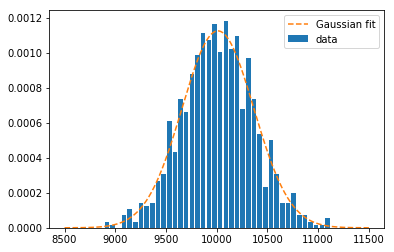

In [129]:
# Plot histogram
plt.hist(x, bins = n, histtype = 'bar', normed = True, rwidth = 0.8, label = 'data')
# Plot Gaussian
x_gaussian = np.linspace(8500, 11500, 1000)
plt.plot(x_gaussian, gaussian(x_gaussian, mean_x, np.sqrt(variance_x)), '--', label = 'Gaussian fit')
plt.legend()
plt.show()


<span style="color:blue"> <i> 5. Repeat part 1-4 for $y$.  </i></span>

For y, mean =  25.8254055957 , variance =  339007.305156 , and median =  32.1687289605


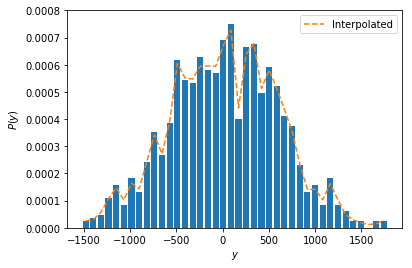

For y, mode =  88.5992080278
For y, 68% confidence interval is 25.8254055957 ± 578.167635069 and 95% interval is 25.8254055957 ± 1158.66424349


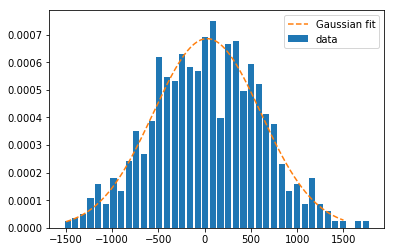

In [135]:
N = len(y); n = int(N/25)

# Calculating "by hand"
mean_y = sum(y)/len(y)
variance_y = sum((y-mean_y)**2)/len(y)

y_sorted = sorted(y)
if len(y)%2 == 0:
    median_y = (y_sorted[int( (len(y)/2)-1 )] + y_sorted[int( (len(y)/2) )])/2.
else:
    median_y =  y_sorted[int( np.floor(len(y)/2) )]

print("For y, mean = ", mean_y, ", variance = ", variance_y, ", and median = ", median_y)

p, yvar = np.histogram(y, bins = n, normed = True)
# Find y values at the center of each bin (call it yvar)
yvar = yvar[:-1] + (yvar[1] - yvar[0])/2

# Find the interpolated function f
f = UnivariateSpline(yvar, p, s=n)
# Change the amount of smoothing
f.set_smoothing_factor(1.e-8)

# Plot both histogram and interpolated function
plt.hist(y, bins = n, histtype = 'bar', normed = True, rwidth = 0.8)
plt.plot(yvar, f(yvar), '--', label = "Interpolated")
plt.ylim(0, 0.0008)
plt.legend()
plt.xlabel('$y$')
plt.ylabel('$P(y)$')
plt.show()

# Find the mode
mode_y = yvar[np.argmax(f(yvar))]

print("For y, mode = ", mode_y)

# Find 68% and 95% confidence intervals

# Define the cdf
p, yvar = np.histogram(y, bins = n, normed = True)
delta_yvar = (yvar[1] - yvar[0])
cdf = p*delta_yvar
for i in range(len(cdf))[1:]:
    cdf[i] = cdf[i-1] + cdf[i]
yvar = yvar[:-1] + (yvar[1] - yvar[0])/2

# Interpolation
cdf_interpolated = UnivariateSpline(yvar, cdf, s=n)
cdf_interpolated.set_smoothing_factor(0)

# Write a function which computes the confidence interval
def findinterval(f, percentage):    
    delta_y = np.sqrt(variance_y)/2000
    testy = np.append( np.arange(mean_y-3*np.sqrt(variance_y), mean_y, delta_y), np.arange(mean_y, mean_y+3*np.sqrt(variance_y), delta_y) )

    ind = int(len(testy)/2)

    for i in range(int(len(testy)/2)):
        if cdf_interpolated(testy[ind+i])-cdf_interpolated(testy[ind-i]) > percentage:
            val = testy[ind+i] - testy[ind]
            break
    return val

print("For y, 68% confidence interval is", mean_y, "±", findinterval(cdf_interpolated, .68), 
      "and 95% interval is", mean_y, "±", findinterval(cdf_interpolated, .95))

# Plot histogram
plt.hist(y, bins = n, histtype = 'bar', normed = True, rwidth = 0.8, label = 'data')
# Plot Gaussian
y_gaussian = np.linspace(-1500, 1500, 1000)
plt.plot(y_gaussian, gaussian(y_gaussian, mean_y, np.sqrt(variance_y)), '--', label = 'Gaussian fit')
plt.legend()
plt.show()

<span style="color:blue"> <i> 6. Make a 2-d scatter plot with Gaussian contours (ellipses). Then, compute the covariance ($C_{xy}$) of $x$ and $y$ as well as the correlation coefficient $\rho = \frac{C_{xy}}{\sigma_{x}\sigma_{y}}$.  </i></span>

The covariance between x and y is 166453.760119
The correlation coefficient of x and y is 0.807162960615


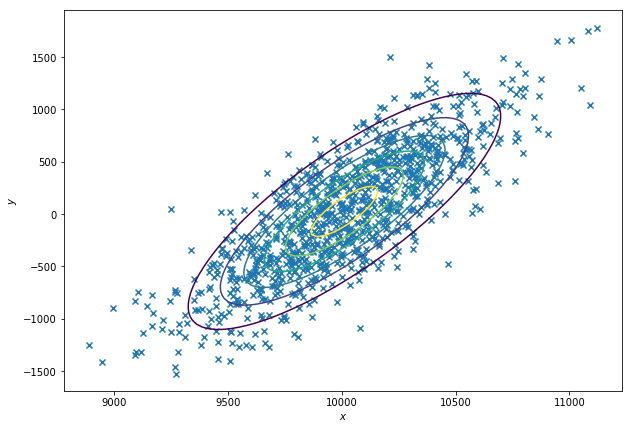

In [140]:
# Compute the covariance and correlation coefficient
cov = 0
for i in range(len(x)):
    cov += (x[i]-np.mean(x))*(y[i]-np.mean(y))
cov = cov/len(x)

print("The covariance between x and y is", cov)

print("The correlation coefficient of x and y is", cov/np.sqrt(variance_x*variance_y))

# Make a 2-d scatter plot with Gaussian contours

import matplotlib.mlab as mlab

# Create coordinate matrices from coordinate vectors.
gridx = np.linspace(9000, 11000, 100)
gridy = np.linspace(-1500, 1500, 100)
X, Y = np.meshgrid(gridx, gridy)

# Create bivariate Gaussian distribution for equal shape X, Y (https://matplotlib.org/api/mlab_api.html)
Z = mlab.bivariate_normal(X, Y, np.sqrt(variance_x), np.sqrt(variance_y), mean_x, mean_y, cov)

# Make plot
plt.figure(figsize = (10, 7))
# Scatter plot
plt.scatter(x, y, marker = 'x')
# Gaussian contour plots
plt.contour(X, Y, Z)

plt.xlabel('$x$')
plt.ylabel('$y$')
plt.show()


The above contour plot is a bird eye view of the 3-d mesh plot; these are ellipses of equal probability. The coloring represents the intensity. Yellow central ellipse is the region of highest probability; the peak of 2-d Gaussian distribution is at the center of this ellipse. As we move away from the peak, the probability lowers.

***

#### Problem 2 - Central Limit Theorem

Plot the binomial distribution $P(N_A, N)$ for different values of $N$ and plot the Gaussian with mean and variance for the binomial. Similarly, plot the Poisson distribution with the mean varying from 1 to 10. See if both binomial and Poisson approach Gaussian as the mean/$N$ increases.<br><br>
(Reference - Kardar p. 41) For the binomial distribution, consider a random variable with two outcomes $A$ and $B$ of relative probabilities $p_A$ and $p_B = 1 - p_A$. The probability that in $N$ trials the event $A$ occurs exactly $N_A$ times is given by the binomial distribution:
$$ p_N(N_A) = \binom{N}{N_A} p_A^{N_A}(1-p_A)^{N-N_A}. $$
<br>
<span style="color:blue"> <i> 1. Plot the binomial distribution $P(N_A, N)$ for $N = 5, 20, 40, 100, 300$ and plot the Gaussian with mean and variance for the binomial. Let $p_A = 0.5$ and $0.1$. Make sure to label each plot.  </i></span>

In [147]:
# Import packages for the bionomial coefficient
from scipy.special import binom

# Define the probability for the binomial distribution
def pdf_binom(p_A, N, N_A):
    return binom(N, N_A)*(p_A**N_A)*((1-p_A)**(N-N_A))

# Define Gaussian distribution
def gaussian(x, mu, sigma):
    return 1./np.sqrt(2*np.pi*sigma**2)*np.exp(-((x-mu)**2)/(2*sigma**2))

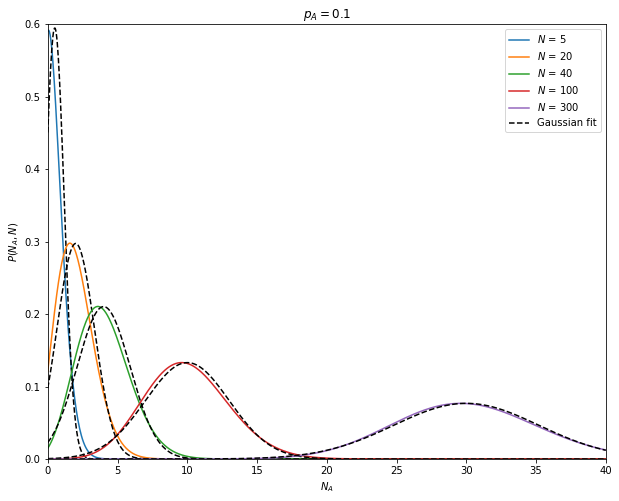

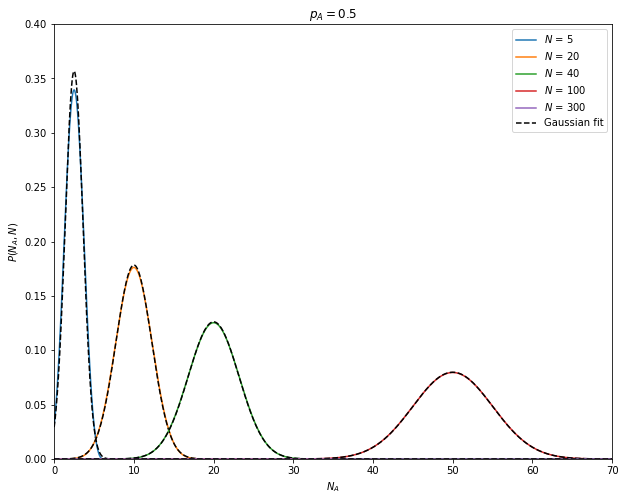

In [155]:
N = [5, 20, 40, 100, 300]
N_A = np.linspace(0, 40, 1000)

# Make plot
plt.figure(figsize= (10, 8))

# For p_A = 0.1
p_A = 0.1
for i in range(len(N)):
    plt.plot(N_A, pdf_binom(p_A, N[i], N_A), label = '$N$ = %d' %N[i])
    if i == len(N)-1:
        plt.plot(N_A, gaussian(N_A, N[i]*p_A, np.sqrt(N[i]*p_A*(1-p_A))), 'k--', label = 'Gaussian fit')
    else:
        plt.plot(N_A, gaussian(N_A, N[i]*p_A, np.sqrt(N[i]*p_A*(1-p_A))), 'k--')
plt.xlim(0, 40)
plt.ylim(0, 0.6)
plt.xlabel('$N_A$')
plt.ylabel('$P(N_A, N)$')
plt.legend()
plt.title('$p_A = 0.1$')
plt.show()

N_A = np.linspace(0, 70, 1000)
plt.figure(figsize= (10, 8))
# For p_A = 0.5
p_A = 0.5
for i in range(len(N)):
    plt.plot(N_A, pdf_binom(p_A, N[i], N_A), label = '$N$ = %d' %N[i])
    if i == len(N)-1:
        plt.plot(N_A, gaussian(N_A, N[i]*p_A, np.sqrt(N[i]*p_A*(1-p_A))), 'k--', label = 'Gaussian fit')
    else:
        plt.plot(N_A, gaussian(N_A, N[i]*p_A, np.sqrt(N[i]*p_A*(1-p_A))), 'k--')
plt.xlim(0, 70)
plt.ylim(0, 0.4)
plt.xlabel('$N_A$')
plt.ylabel('$P(N_A, N)$')
plt.legend()
plt.title('$p_A = 0.5$')
plt.show()

In class, we find that the binomial distribution is approximately normal (with mean $Np_A$ and variance $Np_A(1-p_A)$) as $N \rightarrow \infty$, by the central limit theorem. The proof of this theorem can be carried out using Stirling's approximation:
$$ N! \approx N^N e^{-N}\sqrt{2\pi N} $$
<br>
<span style="color:blue"><i> 2. Plot the above Stirling's formula approximation (i.e. Compare $N!$ with Stirling's approximation. Compute the residual: (actual-estimate)/actual.) </i></span><br>
(Hint: $\Gamma(n+1) = n!$)


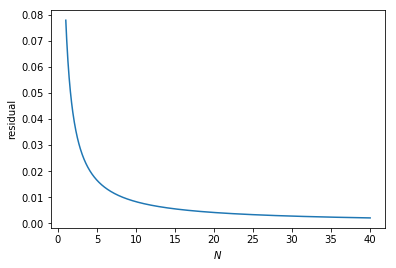

In [235]:
from scipy.special import gamma

Nvals = np.linspace(1, 40, 1000)

actual = gamma(Nvals+1)
estimate = np.sqrt(2*np.pi)*Nvals**(Nvals+0.5)*np.exp(-Nvals)

plt.plot(Nvals, (actual-estimate)/actual)
plt.xlabel('$N$')
plt.ylabel('residual')
plt.show()

You should find that residual $\rightarrow 0$ as $N \rightarrow \infty$.

Next, consider the Poisson distribution (Kardar p. 42):
$$ P(\lambda) = \frac{\lambda^k e^{-\lambda}}{k!} $$
where $k$ is the number of occurrences. Its mean and variance are $\lambda$.<br><br>
<span style="color:blue"> <i> 3. Plot $P(\lambda)$ as a function of $k$ for $\lambda = 1, 3, 5, 10, 20$ and plot the Gaussian with mean and variance for the Poisson. Make sure to label. </i></span><br>

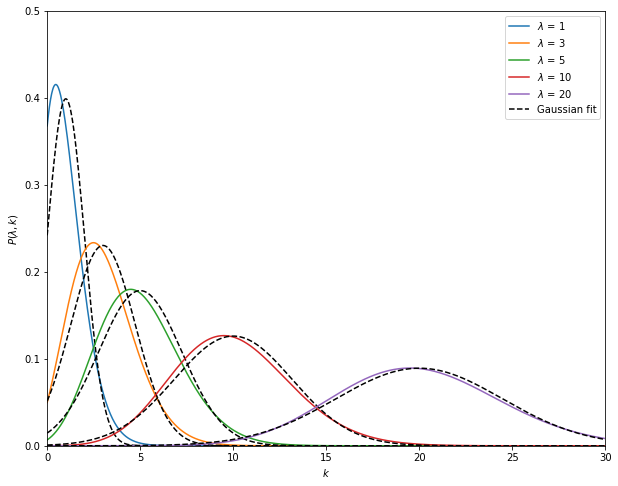

In [163]:
# Define the Poisson distribution
def poisson(L, k):
    return (L**k)*np.exp(-L)/(gamma(k+1))

L = [1, 3, 5, 10, 20]
k = np.linspace(0, 30, 1000)

# Make plot
plt.figure(figsize= (10, 8))

for i in range(len(L)):
    plt.plot(k, poisson(L[i], k), label = '$\lambda$ = %d' %L[i])
    if i == len(L)-1:
        plt.plot(k, gaussian(k, L[i], np.sqrt(L[i])), 'k--', label = 'Gaussian fit')
    else:
        plt.plot(k, gaussian(k, L[i], np.sqrt(L[i])), 'k--')
plt.xlim(0, 30)
plt.ylim(0, 0.5)
plt.xlabel('$k$')
plt.ylabel('$P(\lambda, k)$')
plt.legend()
plt.show()

<span style="color:blue"> <i> 4. What happens as the mean/$N$ increases? </i></span><br>

<span style="color:blue"><i> Answer: </i></span><br>
Both binomial and Poisson distributions becomes approximately normal as the mean/$N$ increases.

***

#### Problem 3 - Fitting Data to a Straight Line (Linear Regression)

(Reference - NR 15.2) We fit a set of 50 data points $(x_i, y_i)$ to a straight-line model $y(x) = a + bx$. The uncertainty $\sigma_i$ associated with each measurement $y_i$ is known, and we assume that the $x_i$'s are known exactly. To measure how well the model agrees with the data, we use the chi-square merti function: <br>
$$ \chi^2(a,b) = \sum_{i=0}^{N-1} \big( \frac{y_i-a-bx_i}{\sigma_i} \big)^2. $$
<br>
Make a scatter plot of data (including uncertainties) and find the best-fit line. Compute the errors on the two parameters $a$ and $b$ and plot lines where the two are changed by $\pm 1\sigma$.

<br>
<span style="color:blue"> <i> 1. Plot data (make sure to include error bars). (Hint - https://matplotlib.org/api/_as_gen/matplotlib.axes.Axes.errorbar.html) </i></span><br>

In [166]:
# Load a given 2D data
data = np.loadtxt("Problem3_data.dat")
x = data[:,0]
y = data[:,1]
sig_y = data[:,2]

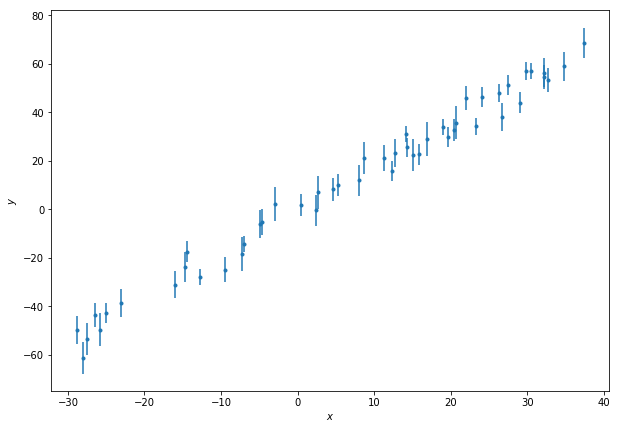

In [167]:
# Make plot
plt.figure(figsize = (10, 7))
# Scatter plot
plt.errorbar(x, y, yerr = sig_y, fmt='.')

plt.xlabel('$x$')
plt.ylabel('$y$')
plt.show()

(NR p. 781) We should minimize the above chi-square function to determine $a$ and $b$. At its minimum, derivatives of $\chi^2$ with respect to $a, b$ vanish:
$$ \frac{\partial{\chi^2}}{\partial{a}} = -2 \sum \frac{y_i - a - bx_i}{\sigma_i^2} = 0 \ \ \ \ \ \ \ \ \ \ \ \ (1) $$
$$ \frac{\partial{\chi^2}}{\partial{b}} = -2 \sum \frac{x_i(y_i - a - bx_i)}{\sigma_i^2} = 0   \ \ \ \ \ \ \ \ \ (2) $$
<br>
These conditions can be rewritten in a convenient form if we define the following sums:
$$ S = \sum \frac{1}{\sigma_i^2},\ S_x = \sum \frac{x_i}{\sigma_i^2},\ S_y = \sum \frac{y_i}
{\sigma_i^2} $$
$$ S_{xx} = \sum \frac{x_i^2}{\sigma_i^2},\ S_{xy} = \sum \frac{x_iy_i}{\sigma_i^2} $$
<br> With these, we can rewrite (1), (2) as:
$$ a*S + b*S_x = S_y $$
$$ a*S_x + b*S_{xx} = S_{xy} $$
<br> The solution to these is calculated as:
$$ \Delta = SS_{xx} - (S_x)^2 $$ <br>
$$ a = \frac{S_{xx}S_y - S_xS_{xy}}{\Delta} $$
$$ b = \frac{SS_{xy} - S_xS_y}{\Delta} $$
<br><span style="color:blue"><i> 2. Find parameters $a, b$ which minimize the chi-square function and plot the best-fit line on top of the data. </i></span><br>

In [176]:
S = sum(sig_y**(-2))
Sx = sum(x*sig_y**(-2))
Sy = sum(y*sig_y**(-2))
Sxx = sum((x**2)*sig_y**(-2))
Sxy = sum(x*y*sig_y**(-2))
Delta = S*Sxx - Sx**2

In [212]:
a = (Sxx*Sy - Sx*Sxy)/Delta
b = (S*Sxy - Sx*Sy)/Delta

xx = np.linspace(-35, 45, 100)
y_fit = a + b*xx

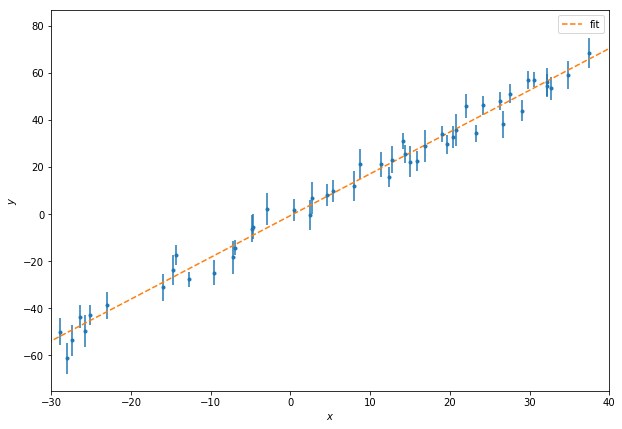

In [217]:
# Make plot
plt.figure(figsize = (10, 7))
plt.errorbar(x, y, yerr = sig_y, fmt='.')
plt.plot(xx, y_fit, '--', label = 'fit')

plt.xlabel('$x$')
plt.ylabel('$y$')
plt.xlim(-30, 40)
plt.legend()
plt.show()

Now, we must estimate the probable uncertainties in the estimates of $a$ and $b$, since obviously the measurement errors in the data must introduce some uncertainty in the determination of those parameters. If the data are independent, then each contributes its own bit of uncertainty to the parameters. Consideration of propagation of errors show that the variance $\sigma_f^2$ in the value of any function will be 
$$ \sigma_f^2 = \sum \sigma_i^2 (\frac{\partial f}{\partial y_i})^2 $$
<br> For the straight line, the derivatives of $a$ and $b$ with respect to $y_i$ can be directly evaluated from teh solution:
$$ \frac{\partial a}{\partial y_i} = \frac{S_{xx}-S_x x_i}{\sigma_i^2 \Delta} $$
$$ \frac{\partial b}{\partial y_i} = \frac{S x_i-S_x}{\sigma_i^2 \Delta} $$
<br> Summing over the points, we get
$$ \sigma_a^2 = S_{xx}/\Delta $$
$$ \sigma_b^2 = S/\Delta $$

<span style="color:blue"> <i> 3. Compute the errors ($\sigma_a, \sigma_b$) on the two parameters $a, b$ and plot lines where the two are changed by $\pm 1\sigma$.</i></span><br>
(Hint - You can use plt.fill_between to shade the region between plots.)

In [223]:
# Calculate sigma_a, sigma_b

a = (Sxx*Sy - Sx*Sxy)/Delta
b = (S*Sxy - Sx*Sy)/Delta

sigma_a = np.sqrt(Sxx/Delta)
sigma_b = np.sqrt(S/Delta)

print('We estimate that a =', a ,"±", sigma_a, "and b =", b, "±", sigma_b)

We estimate that a = -0.595230946639 ± 0.752865780441 and b = 1.77469658755 ± 0.0362401212361


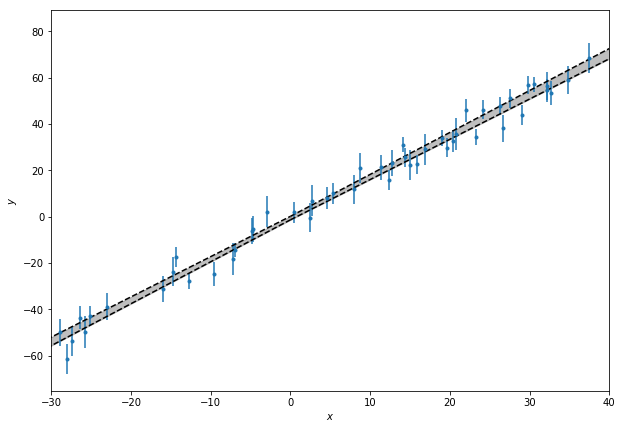

In [234]:
plt.figure(figsize = (10, 7))
plt.errorbar(x, y, yerr = sig_y, fmt='.', label = 'data')

xx1 = np.linspace(-35, 0, 100)
y_fit1 = (a+sigma_a) + (b-sigma_b)*xx1
y_fit2 = (a-sigma_a) + (b+sigma_b)*xx1

xx2 = np.linspace(0, 45, 100)
y_fit3 = (a+sigma_a) + (b+sigma_b)*xx2
y_fit4 = (a-sigma_a) + (b-sigma_b)*xx2

plt.plot(xx1, y_fit1, 'k--')
plt.plot(xx1, y_fit2, 'k--')
plt.plot(xx2, y_fit3, 'k--')
plt.plot(xx2, y_fit4, 'k--')
plt.fill_between(xx1, y_fit1, y_fit2, color='grey', alpha='0.5')
plt.fill_between(xx2, y_fit3, y_fit4, color='grey', alpha='0.5')


plt.xlabel('$x$')
plt.ylabel('$y$')
plt.xlim(-30, 40)
plt.legend()
plt.show()